## Understanding the difference in biomass between high and low NO$_3$ years. 
`Background`: In Notebook `Quartery_biomass_interannual_62_yr.ipynb` I show that the difference in biomass in the summer between high and low NO$_3$ years favors biomass in low NO$_3$ years. 

    - Under `nutrient_limitation.ipynb`, we see that the biggest difference in growth limitation for small phytoplankton and small diatoms in the summer between high and low nutrient years is stronger light limitation in high nutrient years. So I need to understand the sea-ice fraction differences between high vs low nitrate years and between high and low ice years, and why there are stronger differneces in biomass when we look at differences in nutrient concentrations instead of sea-ice

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
#import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib
# Scientific libraries
from numpy import arange,array,ones
from scipy import stats
import os

In [2]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

### Import interannual dataset [All 63 years of the 2$^{nd}$ cycle]
____ 

In [21]:
newNCDFfiles1 = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/SPECTRA_*.nc', recursive=True),
                      key=numericalSort)

ds = xr.open_mfdataset(newNCDFfiles1,combine='by_coords')

In [22]:
ice_ds_inter = np.empty([63,12,384,320])
ice_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    ice_ds_inter[i,:,:,:] = ds.ECOSYS_IFRAC[x[i]:x[i]+12,:,:]

In [5]:
year = '62yravg'

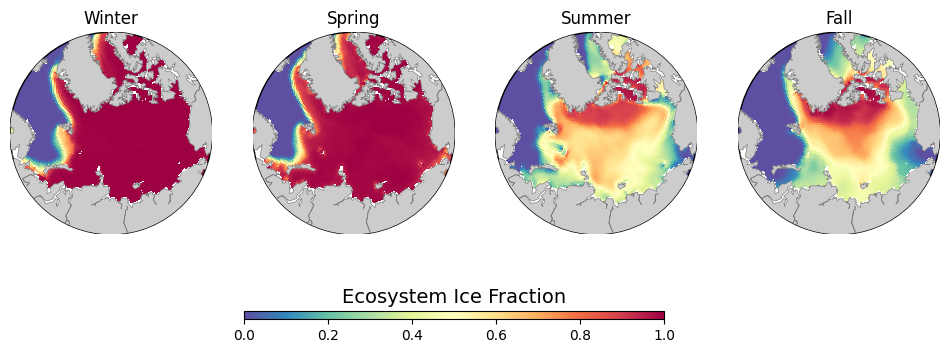

In [6]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'.png', dpi=600, bbox_inches='tight')

### High vs Low NO$_3$ concentrations
____

In [7]:
NO3_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_NO3*.nc', recursive=True))
ds_03= xr.open_mfdataset(NO3_inds,concat_dim='time', combine='nested')

In [8]:
NO3_ds_inter = np.empty([63,12,180,360])
NO3_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    NO3_ds_inter[i,:,:,:] = ds_03.NO3[x[i]:x[i]+12,0,:,:]

In [9]:
no3_arctic = np.nanmean(NO3_ds_inter[:,:,149:180,:], axis=(2,3))
no3_arctic_anom = no3_arctic-np.nanmean(no3_arctic,axis=0)
err_ao = np.nanstd(no3_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
low_no3_years_arctic = np.where(np.nanmean(no3_arctic_anom,axis=1) < -(err_ao/2))
high_no3_years_arctic = np.where(np.nanmean(no3_arctic_anom,axis=1) > (err_ao/2))

In [31]:
ice_ds_inter.shape

(63, 12, 384, 320)

In [32]:
low_no3_years = ice_ds_inter[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_years = ice_ds_inter[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

In [44]:
m.contour?

Signature: m.contour(x, y, data, *args, **kwargs)
Docstring:
Make a contour plot over the map
(see matplotlib.pyplot.contour documentation).

If ``latlon`` keyword is set to True, x,y are intrepreted as
longitude and latitude in degrees.  Data and longitudes are
automatically shifted to match map projection region for cylindrical
and pseudocylindrical projections, and x,y are transformed to map
projection coordinates. If ``latlon`` is False (default), x and y
are assumed to be map projection coordinates.

Extra keyword ``ax`` can be used to override the default axis instance.

If ``tri`` is set to ``True``, an unstructured grid is assumed
(x,y,data must be 1-d) and matplotlib.pyplot.tricontour is used.

Other \*args and \**kwargs passed on to matplotlib.pyplot.contour
(or tricontour if ``tri=True``).
File:      ~/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py
Type:      method


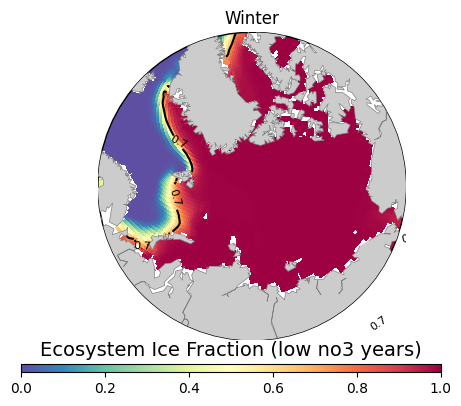

In [55]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(111) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ice_ds_inter[low_no3_years_arctic,:,:,:][:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, winter,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (low no3 years)', fontsize = 14)
m.plot
plt.show()

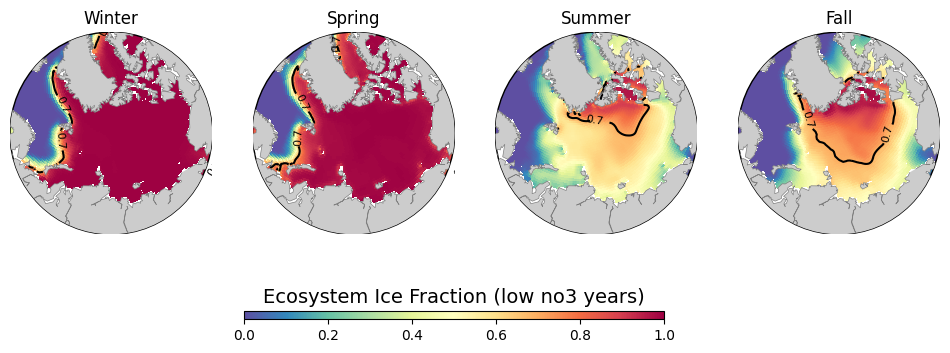

In [50]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_no3_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, winter,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_no3_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, spring,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_no3_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, summer,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_no3_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, fall,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (low no3 years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_low_no3.png', dpi=600, bbox_inches='tight')

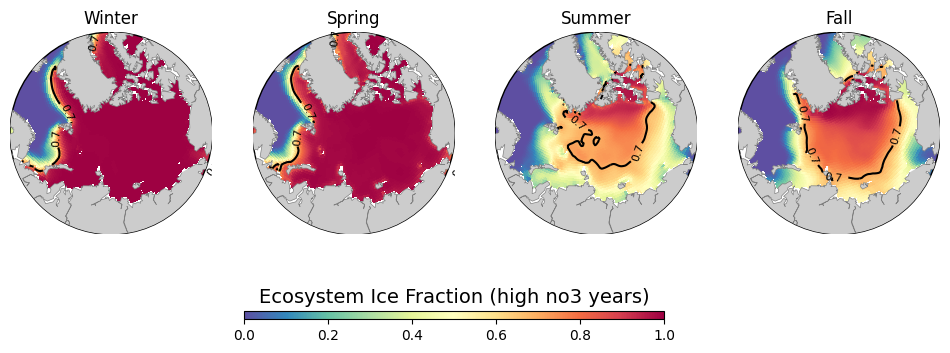

In [51]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, winter,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, spring,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, summer,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, fall,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (high no3 years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_high_no3.png', dpi=600, bbox_inches='tight')

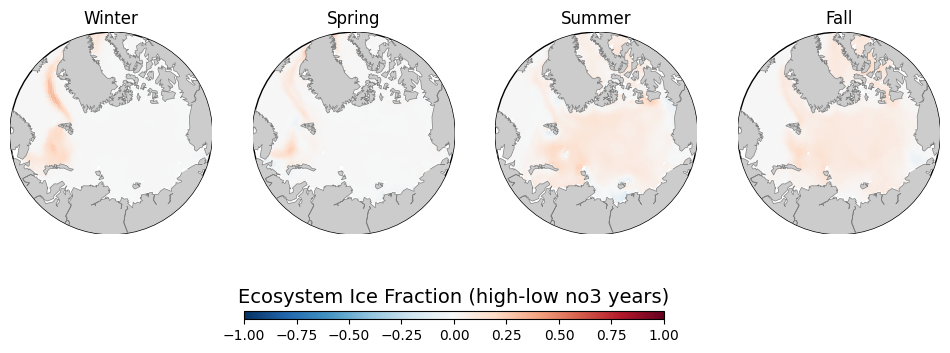

In [52]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,list(range(2)) + [-1]],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='RdBu_r', vmin=-1, vmax=1)
cs = m.contour(x, y, winter,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,2:5,:,:],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='RdBu_r', vmin=-1, vmax=1)
cs = m.contour(x, y, spring,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,5:8,:,:],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='RdBu_r', vmin=-1, vmax=1)
cs = m.contour(x, y, summer,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_no3_years[:,:,8:11,:,:],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='RdBu_r', vmin=-1, vmax=1)
cs = m.contour(x, y, fall,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (high-low no3 years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_high_vs_low_no3.png', dpi=600, bbox_inches='tight')

### High vs Low Ice Fraction 
_____

In [10]:
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_ECOSYS_IFRAC*.nc', recursive=True))
ds_02= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

In [11]:
ECOSYS_IFRAC_ds_inter = np.empty([63,12,180,360])
ECOSYS_IFRAC_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    ECOSYS_IFRAC_ds_inter[i,:,:,:] = ds_02.ECOSYS_IFRAC[x[i]:x[i]+12,:,:]

In [12]:
ice_arctic = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:180,:], axis=(2,3))
ice_arctic_anom = ice_arctic-np.nanmean(ice_arctic,axis=0)
err_ao = np.nanstd(ice_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
low_ice_years_arctic = np.where(np.nanmean(ice_arctic_anom,axis=1) < -(err_ao/2))
high_ice_years_arctic = np.where(np.nanmean(ice_arctic_anom,axis=1) > (err_ao/2))

In [13]:
ECOSYS_IFRAC_ds_inter.shape

(63, 12, 180, 360)

In [23]:
low_ice_years = ice_ds_inter[low_ice_years_arctic,:,:,:] # 1/2 standard deviation 
high_ice_years = ice_ds_inter[high_ice_years_arctic,:,:,:] # 1/2 standard deviation 

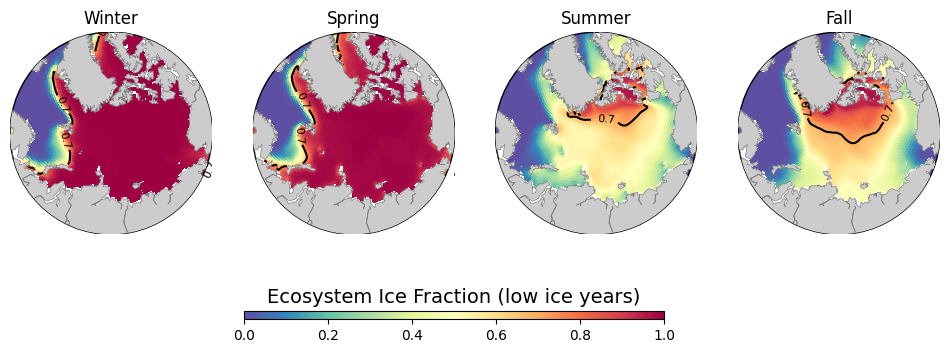

In [53]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_ice_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, winter,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_ice_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, spring,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_ice_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, summer,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(low_ice_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, fall,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (low ice years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_low_ice.png', dpi=600, bbox_inches='tight')

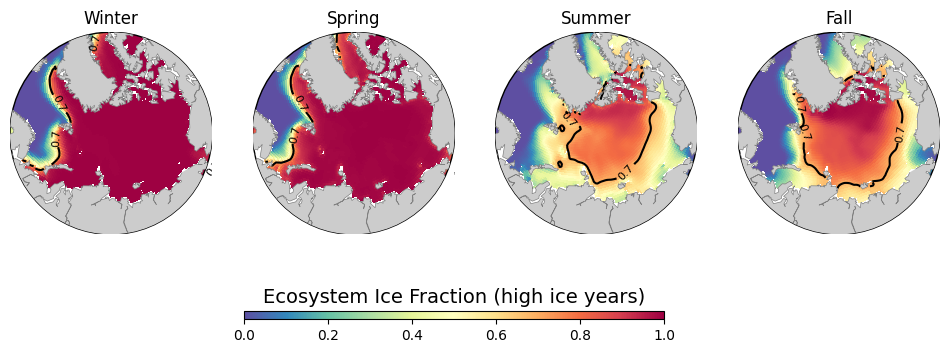

In [54]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, winter,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, spring,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, summer,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='Spectral_r', vmin=0, vmax=1)
cs = m.contour(x, y, fall,levels = [0.7],colors='k');
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (high ice years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_high_ice.png', dpi=600, bbox_inches='tight')

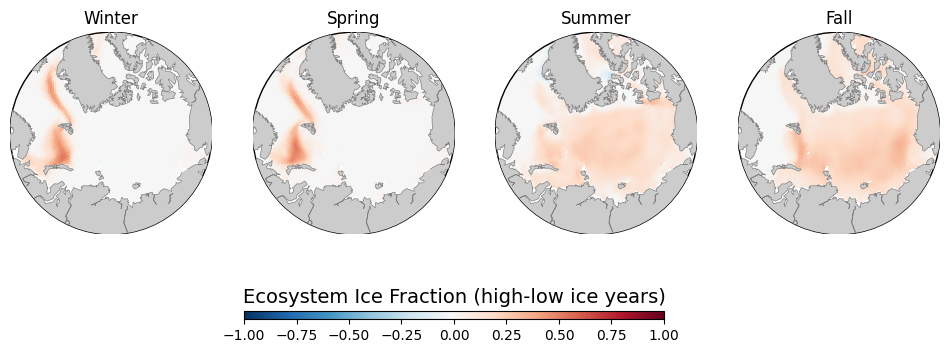

In [29]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,list(range(2)) + [-1]],axis=(0,1,2))-np.nanmean(low_ice_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,2:5,:,:],axis=(0,1,2))-np.nanmean(low_ice_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,5:8,:,:],axis=(0,1,2))-np.nanmean(low_ice_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,8:11,:,:],axis=(0,1,2))-np.nanmean(low_ice_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (high-low ice years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_high_vs_low_ice.png', dpi=600, bbox_inches='tight')

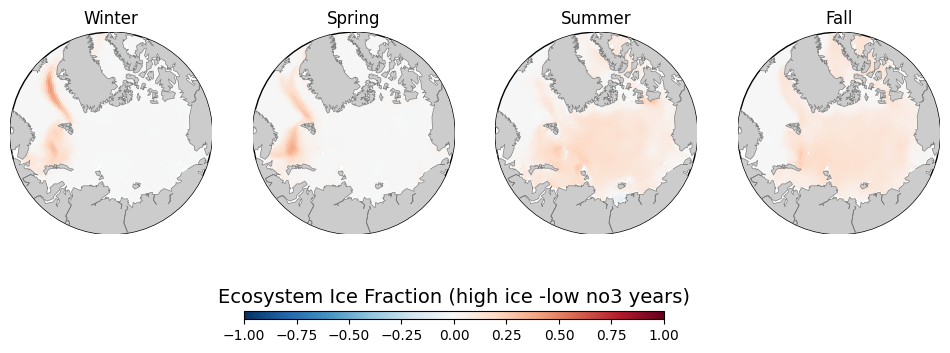

In [40]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,list(range(2)) + [-1]],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,list(range(2)) + [-1]],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,2:5,:,:],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,2:5,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,5:8,:,:],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,5:8,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(high_ice_years[:,:,8:11,:,:],axis=(0,1,2))-np.nanmean(low_no3_years[:,:,8:11,:,:],axis=(0,1,2)))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='RdBu_r', vmin=-1, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction (high ice -low no3 years)', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/Ecosys_IceFrac_Seasonal'+year+'_high_ice_vs_low_no3.png', dpi=600, bbox_inches='tight')